#### In this notebook, we will implement k-means clustering from scratch on Fashion MNIST dataset. <br>
Load the Fashion MNIST (training) dataset, which can be downloaded freom this [repo](https://github.com/zalandoresearch/fashion-mnist), and store it in (or reshape it to) a
matrix $X\,\,\in \mathbb{R}^{60000×784}$. Apply your k-means clustering algorithm to this data-matrix
for different choices of k, and in particular k = 10.

In [18]:
%matplotlib inline
import numpy as np
import numpy.matlib
from scipy.spatial.distance import cdist
#conda install -c anaconda scikit-image
from skimage import data, io
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#jtplot.style(theme="grade3", context="notebook", ticks=True, grid=True)
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=True)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def load_mnist(path, kind = 'train'):
    
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

As we have already downloaded Fashion MNIST from [here](https://github.com/zalandoresearch/fashion-mnist), we can load the (training) fashion MNIST dataset.

In [14]:
fashion_images, fashion_labels = load_mnist('FashionMNIST/')

As a little sanity check we visualise a sample of the dataset, together with the corresponding label and the size of the dataset.

Class label = 2, dataset dimension = 60000 x 784


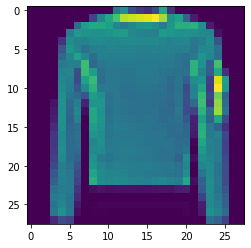

In [15]:
plt.imshow(np.reshape(fashion_images[3917, :], (28, 28)))
print('Class label = %d, dataset dimension = %d x %d' %(fashion_labels[3917], fashion_images.shape[0], \
                                                            fashion_images.shape[1]))

Before we start our computations, we manually set a seed for the random number generator.

In [17]:
np.random.seed(1979)

## K-means clustering

Next, we write a function *k_means_clsutering* that performs k-means clustering for input data *data* and a number of clusters *no_of_clusters*. Optional arguments are the maximum number of iterations *maximum_counter* and the tolerance parameter *tolerance* for when the iteration is considered to have converged.

In [19]:
def k_means_clustering(data, no_of_clusters, maximum_counter=300, tolerance=1e-09):    
    centroids = np.random.randn(data.shape[1], no_of_clusters)
    assignments = np.zeros((data.shape[0], no_of_clusters))
    energy = np.Inf
    counter = 0
    sensitivity = np.Inf    
    while (counter < maximum_counter) and (sensitivity > tolerance):
        previous_energy = energy
        distances = cdist(data, centroids.transpose())
        assignments = np.zeros((data.shape[0], no_of_clusters))
        assignments[np.arange(data.shape[0]), np.argmin(distances, axis=1)] = 1
        centroids = (data.transpose() @ assignments) / np.matlib.repmat(np.sum(assignments, axis=0), data.shape[1], 1)
        energy = np.sum(np.min(distances ** 2, axis=1))
        sensitivity = (previous_energy - energy)/energy
        if counter % 10 == 0:
            print('Iteration [%d/%d], sensitivity: %.4f/%.4f, energy: %.2f' 
                   %(counter, maximum_counter, sensitivity, tolerance, energy))
        counter += 1
    print('Iteration completed!')
    return centroids, assignments

Subsequently, we run the algorithm on the dataset *fashion_images* for 10 clusters. Please also test the code for different numbers of clusters.

In [20]:
centroids, assignments = k_means_clustering(fashion_images, 10)

Iteration [0/300], sensitivity: inf/0.0000, energy: 630952109123.05
Iteration [10/300], sensitivity: 0.0033/0.0000, energy: 134908449524.29
Iteration [20/300], sensitivity: 0.0015/0.0000, energy: 127352999924.68
Iteration [30/300], sensitivity: 0.0008/0.0000, energy: 125470543995.11
Iteration [40/300], sensitivity: 0.0000/0.0000, energy: 125214876358.13
Iteration [50/300], sensitivity: 0.0000/0.0000, energy: 125214491425.38
Iteration completed!


As a test, we visualise the computed centroids.

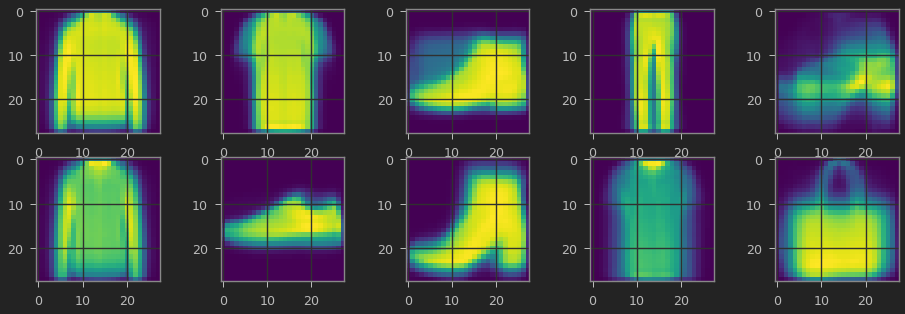

In [22]:
plt.figure(figsize=(16, 5))
for counter in range(10):
    plt.subplot(2, 5, counter+1)
    plt.imshow(np.reshape(centroids[:, counter], (28, 28)))
    
plt.tight_layout 
plt.show()

We compare these cluster centroids to the averages for each class.

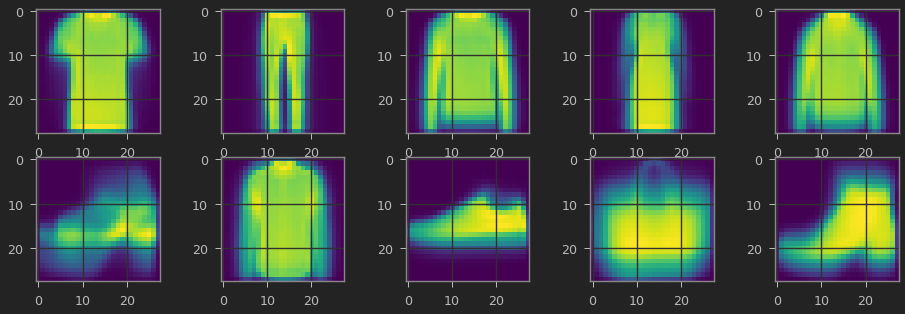

In [23]:
plt.figure(figsize=(16, 5))
for counter in range(10):
    average_image = np.mean(fashion_images[fashion_labels == counter, :], axis=0)
    plt.subplot(2, 5, counter+1)
    plt.imshow(np.reshape(average_image, (28, 28)))
    
plt.tight_layout    
plt.show()

We see that some cluster centres seem to match the averages of the data points for individual classes, but we see that there are also substantial differences for some cluster centres compared to the average images. We now repeat the previous exercise, but we standardise the data first.

In [24]:
def standardise(data):
    data = data - np.mean(data, axis=1).reshape(data.shape[0], 1)
    data = data / np.std(data, axis=1).reshape(data.shape[0], 1)
    return data

fashion_images_standardised = standardise(fashion_images)

new_centroids, new_assignments = k_means_clustering(fashion_images_standardised, 10)

Iteration [0/300], sensitivity: inf/0.0000, energy: 87176631.26
Iteration [10/300], sensitivity: 0.0045/0.0000, energy: 16664920.06
Iteration [20/300], sensitivity: 0.0001/0.0000, energy: 16415403.88
Iteration [30/300], sensitivity: 0.0000/0.0000, energy: 16413860.97
Iteration [40/300], sensitivity: 0.0000/0.0000, energy: 16413771.05
Iteration completed!


Subsequently, we visualise the new centroids.

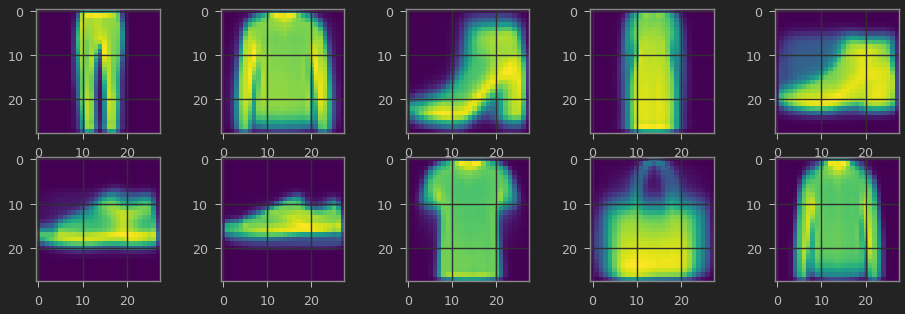

In [25]:
plt.figure(figsize=(16, 5))
for counter in range(10):
    plt.subplot(2, 5, counter+1)
    plt.imshow(np.reshape(new_centroids[:, counter], (28, 28)))
    
plt.tight_layout
plt.show()